# Import Library

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from spyre import server
import ipywidgets as widgets
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline
from ipywidgets import interactive

# 1. Data Pre-processing

## 1.1 Load Web Scraped and Web API’s Data

In [22]:
data=pd.read_csv("WineDotCom.csv").iloc[:,1:]
data.head()
data2=pd.read_csv("TotalWine.csv").iloc[:,1:]
data3=pd.read_csv("AmazonAPI.csv").iloc[:,1:]

FileNotFoundError: File b'WineDotCom.csv' does not exist

## 1.2 Data Cleaning

In [ ]:
def clean_title(value):
    value = str(value).split(',')[0]
    return value
data3['Title'] = data3['Title'].apply(clean_title)

def clean_price(value):
    value = str(value).replace(',', '').replace('$', '').strip()
    return float(value)
data2['Price'] = data2['Price'].apply(clean_price)
data3['Price'] = data2['Price'].apply(clean_price)

def clean_rating(value):
    value = str(value).replace('%', '').replace('width:', '').strip()
    return float(value)/100*5
data2['StarRating'] = data2['StarRating'].apply(clean_rating)

def clean_rater(value):
    if pd.isnull(value):
        return 0
    value = str(value).split('\t')[0][1:]
    return int(value)
data2['numRater'] = data2['numRater'].apply(clean_rater)

In [ ]:
data2.head()

In [ ]:
data3.head()

## 1.3 Data Mapping

In [ ]:
data_match1=pd.DataFrame(columns=['Title', 'Title2'])
titles=list(data2['Title'].unique())
for index in data.index:
    if pd.isnull(data.loc[index]['Year']):
        year=''
    else: year=str(int(data.loc[index]['Year']))
    for title in titles:
        if year in title:
            if fuzz.token_sort_ratio(data.loc[index]['Title'], title)>=90:
                data_match1=data_match1.append({'Title': data.loc[index]['Title'],'Title2': title},ignore_index=True)
                break

In [ ]:
data_match2=pd.DataFrame(columns=['Title', 'Title2'])
titles=list(data3['Title'].unique())
for index in data.index:
    for title in titles:
        if fuzz.token_set_ratio(data.loc[index]['Title'], title)==100:
            data_match2=data_match2.append({'Title': data.loc[index]['Title'],'Title2': title},ignore_index=True)
            break

In [ ]:
df1=pd.merge(data_match,data2,left_on='Title2',right_on='Title').drop('Title_y',1).rename(columns={'Title_x':'Title'})
df1['Website']='Total Wine'
df2=pd.merge(data_match2,data3,left_on='Title2',right_on='Title').drop('Title_y',1).rename(columns={'Title_x':'Title'})
df2['Website']='Amazon'
data_compare=df1.append(df2,sort=False)
data_compare.head()
data_compare.to_csv("data_compare.csv")

In [ ]:
data['minPrice']=data['Price']
minPrice=data['minPrice'].copy()
for index in data.index:
    m=data_compare[data_compare['Title']==data.loc[index]['Title']]['Price'].min()
    if not pd.isnull(m):
        minPrice[index]=min(data.loc[index]['minPrice'],m)
data['minPrice']=minPrice

In [ ]:
data['meanRating']=data['StarRating']
data['totalRater']=data['numRater']
meanRating=data['meanRating'].copy()
totalRater=data['totalRater'].copy()
for index in data.index:
    r=data_compare[data_compare['Title']==data.loc[index]['Title']]['StarRating'].mean()
    n=data_compare[data_compare['Title']==data.loc[index]['Title']]['numRater'].sum()
    if (not pd.isnull(r)) & (not pd.isnull(n)):
        totalRater[index]=data.loc[index]['numRater']+n
        meanRating[index]=(data.loc[index]['StarRating']*data.loc[index]['numRater']+r*n)/totalRater[index]
data['meanRating']=meanRating
data['totalRater']=totalRater
data.head()
data.to_csv("data.csv")

# 2. File Loading

## 2.1 Load csv 

In [27]:
data = pd.read_csv('data.csv',encoding='latin-1').iloc[:,1:]

## 2.2 Load Text File  

In [28]:
#View description of varietal
all_files = os.listdir("Varietal/") #suppose you are one directory above test dir
print(all_files)
txt_files = filter(lambda x: x[-4:] == '.txt', all_files) #filter out all the text files 
print(txt_files)
varietal_files = list(txt_files)

['Carmenere.txt', 'Tempranillo.txt', 'Pinot Gris:Grigio.txt', 'Cabernet Franc.txt', 'Chardonnay.txt', '.DS_Store', 'Vermentino.txt', 'Barbera.txt', 'Torrontes.txt', 'Gamay.txt', 'Port.txt', 'Albarino.txt', 'Tannat.txt', 'Zinfandel.txt', 'Chenin Blanc.txt', 'Malbec.txt', 'Aligote.txt', 'Merlot.txt', 'Muscat.txt', 'Syrah:Shiraz.txt', 'Mourvedre.txt', 'Nero d&apos;Avola.txt', 'Assyrtiko.txt', 'Sauvignon Blanc.txt', 'Rhone Red Blends.txt', 'Roussanne.txt', 'Aglianico.txt', 'Godello.txt', 'RosÌ©.txt', 'Bordeaux Red Blends.txt', 'Sangiovese.txt', 'Petite Sirah.txt', 'Nebbiolo.txt', 'Rhone White Blends.txt', 'Pinot Noir.txt', 'Cabernet Sauvignon.txt', 'Riesling.txt', 'Montepulciano.txt', 'Tuscan Blends.txt', 'Grenache.txt', 'Melon de Bourgogne.txt', 'Falanghina.txt', 'Pinotage.txt']


In [29]:
os.chdir("Varietal/")
varietal_intro = {}
for f in varietal_files :
    with open(f, 'r') as file:
        varietal_intro[f] = file.read()

In [30]:
varietal_intro['Aligote.txt']

'\ufeffAligote\nPerfect ripeness balanced with a characteristic acidity make Aligoté a unique white grape in Burgundy. But since Chardonnay reigns supreme across the appellation, Aligoté almost always ends up unfairly lost in its shadow—though not always! In Côte Chalonnaise, in a quaint village named Bouzeron, just south of the Côte de Beaune, Aligoté has its very own appellation where yields are limited in order to enhance the grape’s flavors and aromas. Some of the world’s very best come from there. And curiously, the famous producer, Domaine Ponsot, bottles a 100% Aligoté from its Premier Cru in Morey-Ste-Denis, Les Monts Luisants, made from Aligoté vines planted in 1911. Vignerons in the New World experiment with the grape but it is really most popular outside of Burgundy in the Eastern European countries of Romania, Burlgaria, Ukraine, and Moldova. What makes Aligoté unique is its intense citrus fruit flavors balanced by a floral character of honeysuckle blossom and a supple text

In [56]:
os.chdir("..") #move up one directory

# 3. Statistical Analysis and Visualization

## 3.1 Price Analysis

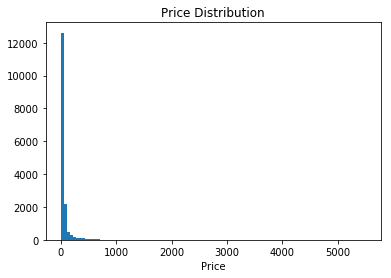

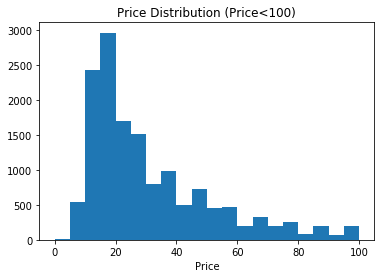

In [31]:
def PriceAnalysis():
    plt.hist(data['minPrice'],100)
    plt.xlabel('Price')
    plt.title('Price Distribution')
    plt.show()
    plt.hist(data[data['minPrice']<100]['minPrice'],20)
    plt.xlabel('Price')
    plt.title('Price Distribution (Price<100)')
    plt.show()
PriceAnalysis()

## 3.2 Varietal Analysis

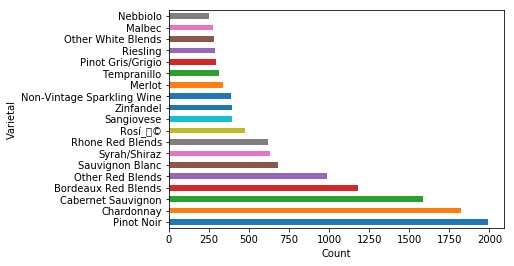

In [32]:
def varietalAnalysis():
    varietal=data.groupby(['Varietal']).size().sort_values(ascending=False)
    varietal[varietal>200].plot(kind="barh")
    plt.title('')
    plt.xlabel('Count')
varietalAnalysis()

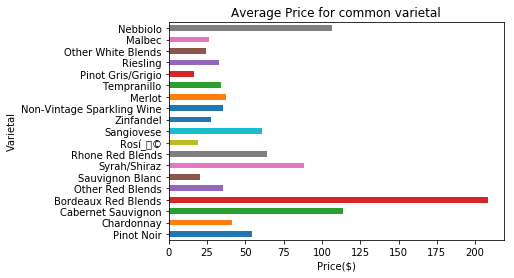

In [33]:
def varietal_price():
    varietal=data.groupby(['Varietal']).size().sort_values(ascending=False)
    df = data.groupby(['Varietal'])['minPrice'].agg(np.mean)
    varietal_price = pd.DataFrame(df)
    varietal_price
    df_new = pd.DataFrame(varietal[varietal>200])
    df_new.merge(varietal_price, left_index=True, right_index=True)['minPrice'].plot(kind="barh")
    plt.title('Average Price for common varietal')
    plt.xlabel('Price($)')
varietal_price()

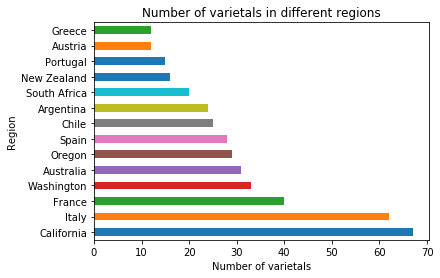

In [109]:
def varietal_region():
    varietal_country=data[['Country','Varietal']].drop_duplicates().groupby(['Country']).size().sort_values(ascending=False)
    varietal_country[varietal_country>10].plot(kind="barh")
    plt.title('Number of varietals in different regions')
    plt.xlabel('Number of varietals')
    plt.ylabel('Region')
varietal_region()

## 3.3 Region Analysis 

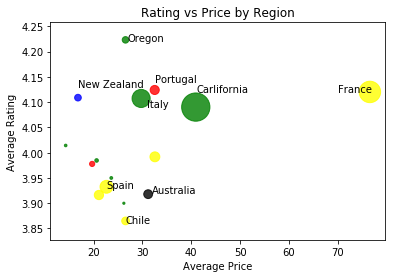

In [51]:
def regionAnalysis():
    wine = data[data["StarRating"]>0]
    count = pd.DataFrame(wine.groupby('Country').agg(['count'])['Title']).reset_index()
    avg_price = pd.DataFrame(wine.groupby('Country')['Price'].agg(['mean'])).reset_index()
    avg_star = pd.DataFrame(wine.groupby('Country')['StarRating'].agg(['mean'])).reset_index()
    count['avg_price'] = avg_price['mean']
    count['avg_star'] = avg_star['mean']
    count_revised =  count.loc[count['count'] >= 5].reset_index()
    col = ['yellow','black','green','yellow','yellow','green',
        'green','green','green','green','blue','green','red','red','yellow','yellow',
        'yellow','yellow','black','yellow','yellow','green','red','blue','green',
        'yellow','yellow']
    plt.title('Rating vs Price by Region')
    plt.xlabel('Average Price')
    plt.ylabel('Average Rating')
    plt.scatter(x = count_revised['avg_price'], y = count_revised['avg_star'], s = count_revised['count'], c = col, alpha = 0.8)
    plt.text(41, 4.12, 'Carlifornia')
    plt.text(70, 4.12, 'France')
    plt.text(31, 4.09, 'Italy' )
    plt.text(22.64, 3.93, 'Spain')
    plt.text(32, 3.92, 'Australia')
    plt.text(32.65,4.14, 'Portugal')
    plt.text(26.54, 3.86, 'Chile')
    plt.text(16.83, 4.13, 'New Zealand')
    plt.text(27, 4.22, 'Oregon')
regionAnalysis()

## 3.4 Year Analysis 

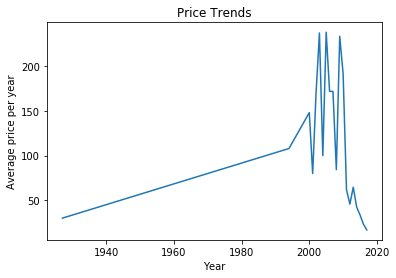

In [52]:
wine = data[data["StarRating"]>0]
year_price = pd.DataFrame(wine.groupby('Year')['Price'].agg(['mean'])).reset_index()
year_price
plt.xlabel('Year')
plt.ylabel('Average price per year')
plt.title('Price Trends')
plt.plot(year_price['Year'], year_price['mean'])

## 3.5 Professional Rating Analysis 

In [36]:
def drop_columns(df, column_names):
    df = df.drop(column_names, axis = 1)
    return df
def get_groupby_counts(df, groups):
    result = df.groupby(groups).count()
    return result

In [37]:
df = drop_columns(data, ['Shopping_Link','Img_src'])
df = df[df["Professional Score"] > 0]

In [38]:
professional_tab = pd.crosstab(df["Professional Score"], df['Country'], margins = True)
professional_tab

Country,Argentina,Australia,Austria,California,Chile,China,England,France,Germany,Greece,...,Other,Other U.S.,Portugal,Slovenia,South Africa,Spain,Uruguay,Virginia,Washington,All
Professional Score,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,23,0,0,0,4,1,0,...,0,0,0,0,0,1,0,0,0,29
9.0,48,37,10,521,24,0,2,198,12,5,...,1,1,34,1,16,84,0,1,41,1245
10.0,10,5,0,62,4,0,0,61,1,0,...,0,0,9,0,1,21,0,0,15,235
88.0,3,1,0,13,1,0,0,2,0,0,...,0,0,2,0,3,5,0,0,2,33
89.0,21,21,1,180,11,0,0,56,1,0,...,0,0,6,0,8,20,0,0,17,409
90.0,0,0,0,4,1,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,10
91.0,38,41,10,435,34,0,1,271,10,6,...,0,1,29,0,8,66,3,0,35,1179
92.0,46,66,7,509,29,0,3,356,7,2,...,0,0,23,0,14,82,1,1,43,1419
93.0,30,55,2,382,13,1,3,286,5,0,...,0,0,23,1,3,55,0,0,35,1085


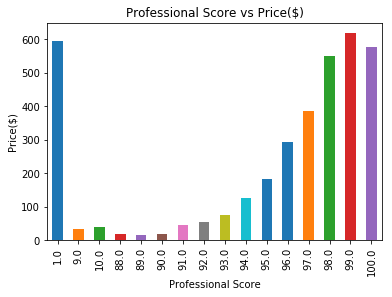

In [123]:
def professionalRating():
    professional_rating_price = data.groupby(['Professional Score']).Price.mean()
    professional_rating_price.plot.bar()
    plt.title('Professional Score vs Price($)')
    plt.ylabel('Price($)')
professionalRating()

## 3.5 Buyers Rating Analysis 

In [40]:
#buyer ratings Crosstab
df = drop_columns(data, ['Shopping_Link','Img_src'])
df = df[df["StarRating"] > 0]
buyer_tab = pd.crosstab(df.StarRating, df.Year, margins = True)
buyer_tab
rating25 = pd.DataFrame(buyer_tab[3:4] + buyer_tab[0:1].values + buyer_tab[1:2].values + buyer_tab[2:3].values, columns = buyer_tab[0:1].columns)
rating25
rating30 = pd.DataFrame(buyer_tab[4:5].values + buyer_tab[5:6].values + buyer_tab[6:7].values + buyer_tab[7:8].values + buyer_tab[8:9], columns = buyer_tab[0:1].columns)
rating30
rating35 = pd.DataFrame(buyer_tab[9:10].values + buyer_tab[10:11].values + buyer_tab[11:12].values + buyer_tab[12:13].values + buyer_tab[13:14], columns = buyer_tab[0:1].columns)
rating35
rating40 = pd.DataFrame(buyer_tab[14:15].values + buyer_tab[15:16].values + buyer_tab[16:17].values + buyer_tab[17:18].values + buyer_tab[18:19], columns = buyer_tab[0:1].columns)
rating40
rating45 = pd.DataFrame(buyer_tab[19:20].values + buyer_tab[20:21].values + buyer_tab[21:22].values + buyer_tab[22:23].values + buyer_tab[23:24], columns = buyer_tab[0:1].columns)
rating45
rating50 = pd.DataFrame(buyer_tab[24:25].values + buyer_tab[25:26].values + buyer_tab[26:27].values + buyer_tab[27:28].values + buyer_tab[28:29], columns = buyer_tab[0:1].columns)
rating50
allogate_crosstab = rating25.append(rating30)
allogate_crosstab = allogate_crosstab.append(rating35)
allogate_crosstab = allogate_crosstab.append(rating40)
allogate_crosstab = allogate_crosstab.append(rating45)
allogate_crosstab = allogate_crosstab.append(rating50)
allogate_crosstab

Year,1927.0,1994.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,All
StarRating,,,,,,,,,,,,,,,,,,,,,
2.6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,2,0,6
3.1,0,0,0,0,0,0,0,1,0,0,...,1,2,1,3,5,9,9,4,0,35
3.6,0,0,0,0,0,0,0,0,1,0,...,2,4,9,10,27,45,81,62,11,253
4.1,0,0,1,1,1,1,0,2,1,1,...,4,3,12,38,77,179,212,195,40,770
4.6,1,0,3,0,0,0,1,6,5,2,...,15,12,22,29,72,149,173,154,49,695
All,1,2,4,1,7,3,1,13,11,7,...,24,30,46,91,205,437,518,467,130,2005


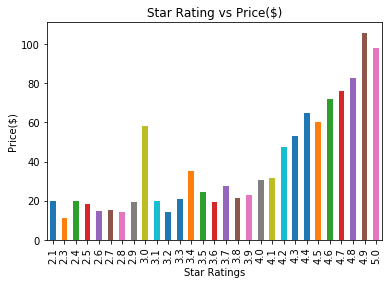

In [122]:
def buyerRating():
    star_rating_price = data.groupby(['StarRating']).Price.mean()
    star_rating_price.plot.bar()
    plt.title('Star Rating vs Price($)')
    plt.xlabel('Star Ratings')
    plt.ylabel('Price($)')
buyerRating()

## 3.6 Popularity Analysis 

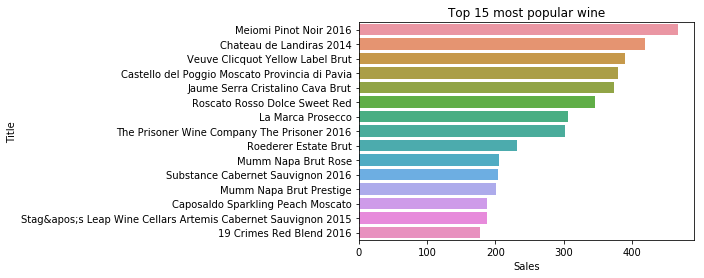

In [119]:
def popularityAnalysis():
    df = data.loc[:,['Title','numRater']]
    new_df = df.sort_values('numRater', ascending=False).head(15)
    sns.barplot(x='numRater', y='Title', data=new_df, orient='h')
    plt.title('Top 15 most popular wine')
    plt.xlabel('Sales')
popularityAnalysis()

# 4. Overview for Users

In [124]:
plot0 = interactive(popularityAnalysis)
plot1 = interactive(varietal_price)
plot2 = interactive(varietal_region)
plot3 = interactive(regionAnalysis)
plot4 = interactive(professionalRating)
plot5 = interactive(buyerRating)

In [125]:
children = [plot0,plot1, plot2, plot3, plot4,plot5]
tab = widgets.Tab()
tab.children = children
tab.set_title(0, 'Popular Wine')
tab.set_title(1, 'Varietal vs Price')
tab.set_title(2, 'Varietal vs Region')
tab.set_title(3, 'Region Overview')
tab.set_title(4, 'Professional Ratings Overview')
tab.set_title(5, 'Buyers Ratings Overview')
tab

Tab(children=(interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',))), _titles={'0': 'Popular Wine', '1': 'Varietal vs Price', '2': 'Varietal vs Region', '3': 'Region Overview', '4': 'Professional Ratings Overview', '5': 'Buyers Ratings Overview'})

# 5. Recommendation System

## --Recommend Products based on Users' prefernces

## 5.1 Search by Title 

In [45]:
Search = widgets.Text(
    value= None,
    placeholder='Type something',
    description='Search:',
    disabled=False
)
Search

Text(value='', description='Search:', placeholder='Type something')

In [104]:
product_idx = {}
booleanVal_product=[None] * len(data)
for i in range(0, len(data)):
    ratio = fuzz.ratio(Search.value, data.ix[i,'Title'])
    partial_ratio = fuzz.partial_ratio(Search.value, data.ix[i,'Title'])
    token_ratio = fuzz.token_sort_ratio(Search.value,data.ix[i,'Title'])
    if ratio == 100: 
        print(str(i) + ' ' +data.ix[i,'Title'])
        product_idx[i] = ratio
        booleanVal_product[i] = True
    else:
        if partial_ratio >= 90:
            print(str(i) + ' ' +data.ix[i,'Title'])
            product_idx[i] = partial_ratio
            booleanVal_product[i] = True
        elif token_ratio >= 90:
            print(str(i) + ' ' +data.ix[i,'Title'])
            product_idx[i] = token_ratio
            booleanVal_product[i] = True
        else:
            booleanVal_product[i] = False

3 Rombauer Chardonnay 2017
9845 Merf Chardonnay 2017


In [105]:
df = data
df = df.loc[booleanVal_product,:]
df_product = pd.DataFrame(product_idx, index=['score']).T.sort_values(by='score',ascending=False)

In [106]:
index = list(df_product.index)
df_display = data.ix[index,['Title', 'Price', 'Professional Score', 'StarRating','numRater']]
df_display

,Title,Price,Professional Score,StarRating,numRater
3,Rombauer Chardonnay 2017,36.99,91.0,4.9,9
9845,Merf Chardonnay 2017,11.99,NaN,NaN,0


## Compare Prices 

In [107]:
df_display.iloc[0,:]

Title                 Rombauer Chardonnay 2017
Price                                    36.99
Professional Score                          91
StarRating                                 4.9
numRater                                     9
Name: 3, dtype: object

## 5.2 Search by Varietal 

In [101]:
selectVarietal = widgets.Dropdown(
    options=list(tasteData.iloc[:,0].unique()),
    value = None,
    description='Varietal:'
)
selectVarietal

Dropdown(description='Varietal:', options=('Falanghina', 'Negroamaro', 'Montepulciano', 'Grillo', 'Vermouth', 'Non-Vintage Sparkling Wine', 'Malvasia', 'Junmai', 'Junmai-Daiginjo', 'Junmai-Ginjo', 'Rhone White Blends', 'Zinfandel', 'Arneis', 'Tannat', 'Furmint', 'Picpoul', 'Madeira', 'Verdelho', 'Pinot Blanc', 'Gewurztraminer', 'Semillon', 'Pedro XimÕ©nez', 'Touriga Nacional', 'White Zinfandel', 'Red Sparkling Wine', 'Sherry', 'Gruner Veltliner', 'Lambrusco', 'Viognier', 'Vernaccia', 'Greco', 'Riesling', 'Vermentino', 'Chenin Blanc', 'In Box Glassware', 'Bordeaux White Blends', 'Other White Blends', 'Other White Wine', 'Pinotage', 'Petite Sirah', 'Mourvedre', 'Malbec', 'Sauvignon Blanc', 'Nebbiolo', 'Barbera', 'Bordeaux Red Blends', 'Friulano', 'Verdicchio', 'Gamay', 'Garganega', 'Rhone Red Blends', 'Grenache', 'Pinot Noir', 'Cabernet Franc', 'Tuscan Blends', 'Roussanne', 'Merlot', 'Pinot Gris/Grigio', 'Cabernet Sauvignon', 'Syrah/Shiraz', 'Tempranillo', 'Sangiovese', 'Chardonnay', 'Mixed Collections', 'Other Red Blends', 'Other Red Wine', 'Melon de Bourgogne', 'Assyrtiko', 'Aglianico', 'Verdejo', 'Grechetto', 'Muller Thurgau', 'Valdiguie', 'Lagrein', 'Aligote', 'Corvina', 'Zweigelt', 'Cortese', 'Trebbiano', 'Albarino', 'Godello', 'Petit Verdot', 'Dolcetto', 'Muscat', 'Carmenere', 'Bonarda', 'Cinsault', 'Port', 'Other Dessert', 'Torrontes', 'Carignan', 'Vintage Sparkling Wine', 'RosÕ© Sparkling Wine', 'Marsanne', 'RosÕ©', 'Nero d&apos;Avola', 'Primitivo', 'Grenache Blanc'), value=None)

In [68]:
#Display Introduction
varietal_filename = selectVarietal.value+".txt"
try:
    varietal_intro[varietal_filename]
except:
    print("No Results Matched")

No Results Matched


In [69]:
df = data
if selectVarietal.value: 
    boolVal_varietal = (df['Varietal'] == selectVarietal.value)
else:
    boolVal_varietal = (df['Varietal'] != 0)
    print("No result")
df.loc[boolVal_varietal,:]
#boolVal_varietal

,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_V,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src,minPrice,meanRating,totalRater
635,Gerovassiliou Malagousia 2016,2016.0,Other White Wine,27.99,Macedonia,Greece,NaN,90.0,NaN,NaN,...,NaN,NaN,9.0,NaN,0,https://www.wine.com/product/Gerovassiliou-Mal...,https://www.wine.com/product/images/fl_progres...,27.99,0.0,0
820,Planeta Etna Bianco 2016,2016.0,Other White Wine,27.99,Sicily,Italy,NaN,NaN,NaN,NaN,...,NaN,NaN,93.0,4.6,7,https://www.wine.com/product/Planeta-Etna-Bian...,https://www.wine.com/product/images/fl_progres...,27.99,4.6,7
897,Clelia Romano Colli di Lapio Fiano di Avellino...,2017.0,Other White Wine,26.99,Campania,Italy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Clelia-Romano-Col...,https://www.wine.com/product/images/fl_progres...,26.99,0.0,0
1268,Quintodecimo Fiano di Avellino Exultet 2016,2016.0,Other White Wine,58.99,Campania,Italy,90.0,NaN,NaN,NaN,...,NaN,NaN,92.0,NaN,0,https://www.wine.com/product/Quintodecimo-Fian...,https://www.wine.com/product/images/fl_progres...,58.99,0.0,0
1422,Pietradolce Etna Bianco 2017,2017.0,Other White Wine,21.99,Sicily,Italy,NaN,NaN,NaN,NaN,...,NaN,NaN,89.0,NaN,0,https://www.wine.com/product/Pietradolce-Etna-...,https://www.wine.com/product/images/fl_progres...,21.99,0.0,0
1927,Feudi di San Gregorio Fiano di Avellino 2016,2016.0,Other White Wine,19.99,NaN,Italy,NaN,92.0,NaN,NaN,...,NaN,NaN,92.0,3.8,6,https://www.wine.com/product/Feudi-di-San-Greg...,https://www.wine.com/product/images/fl_progres...,19.99,3.8,6
1976,Dr. Konstantin Frank Rkatsiteli 2017,2017.0,Other White Wine,21.99,Finger Lakes,New York,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Dr-Konstantin-Fra...,https://www.wine.com/product/images/fl_progres...,21.99,0.0,0
2115,Terredora di Paolo Fiano di Avellino 2016,2016.0,Other White Wine,24.99,Campania,Italy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Terredora-di-Paol...,https://www.wine.com/product/images/fl_progres...,24.99,0.0,0
2126,Cataldi Madonna Pecorino Giulia 2016,2016.0,Other White Wine,22.99,Abruzzo,Italy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Cataldi-Madonna-P...,https://www.wine.com/product/images/fl_progres...,22.99,0.0,0
2170,Balo Anderson Valley Pinot Noir Blanc 2016,2016.0,Other White Wine,29.99,Mendocino,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Balo-Anderson-Val...,https://www.wine.com/product/images/fl_progres...,29.99,0.0,0


## 5.3 Search by Price Range 

In [86]:
selectPrice = widgets.FloatRangeSlider(
    value=None,
    min=0,
    max=5500.0,
    step=0.1,
    description='Price Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
selectPrice

FloatRangeSlider(value=(1375.0, 4125.0), continuous_update=False, description='Price Range:', max=5500.0)

In [87]:
selectPrice.value
minPrice = selectPrice.value[0]
maxPrice = selectPrice.value[1]
df = data

boolVal_price = (df['Price']>=minPrice) & (df['Price']<=maxPrice)
df.loc[boolVal_price,:]

,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_V,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src,minPrice,meanRating,totalRater
50,Chateau Margaux 2015,2015.0,Bordeaux Red Blends,1699.97,Bordeaux,France,99.0,99.0,NaN,NaN,...,NaN,100.0,100.0,NaN,0,https://www.wine.com/product/Chateau-Margaux-2...,https://www.wine.com/product/images/fl_progres...,1699.97,0.0,0
205,Chateau Lafite Rothschild (1.5 Liter Magnum) 2015,2015.0,Bordeaux Red Blends,1499.97,Bordeaux,France,NaN,96.0,NaN,NaN,...,NaN,96.0,97.0,NaN,0,https://www.wine.com/product/Chateau-Lafite-Ro...,https://www.wine.com/product/images/fl_progres...,1499.97,0.0,0
6612,Chateau Cheval Blanc 1943,1943.0,Bordeaux Red Blends,3999.97,Bordeaux,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Chateau-Cheval-Bl...,https://www.wine.com/product/images/fl_progres...,3999.97,0.0,0
6814,Chateau Petrus 2014,2014.0,Bordeaux Red Blends,2399.99,Bordeaux,France,95.0,93.0,NaN,NaN,...,NaN,NaN,95.0,NaN,0,https://www.wine.com/product/Chateau-Petrus-20...,https://www.wine.com/product/images/fl_progres...,2399.99,0.0,0
7213,Fontodi Flaccianello della Pieve (6 Liter Bott...,2010.0,Sangiovese,1499.98,Tuscany,Italy,NaN,97.0,NaN,NaN,...,NaN,NaN,97.0,NaN,0,https://www.wine.com/product/Fontodi-Flacciane...,https://www.wine.com/product/images/fl_progres...,1499.98,0.0,0
7569,Chateau Lafite Rothschild 1996,1996.0,Bordeaux Red Blends,1599.97,Bordeaux,France,96.0,100.0,NaN,NaN,...,NaN,NaN,98.0,NaN,0,https://www.wine.com/product/Chateau-Lafite-Ro...,https://www.wine.com/product/images/fl_progres...,1599.97,0.0,0
7878,Chateau Petrus (Futures Pre-Sale) 2017,2017.0,Bordeaux Red Blends,2699.97,Bordeaux,France,NaN,95.0,NaN,NaN,...,97.0,NaN,96.0,NaN,0,https://www.wine.com/product/Chateau-Petrus-Fu...,https://www.wine.com/product/images/fl_progres...,2699.97,0.0,0
7999,Chateau Petrus 1987,1987.0,Bordeaux Red Blends,2499.97,Bordeaux,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Chateau-Petrus-19...,https://www.wine.com/product/images/fl_progres...,2499.97,0.0,0
8882,Chateau Petrus 2003,2003.0,Bordeaux Red Blends,2999.97,Bordeaux,France,98.0,95.0,NaN,NaN,...,NaN,NaN,97.0,NaN,0,https://www.wine.com/product/Chateau-Petrus-20...,https://www.wine.com/product/images/fl_progres...,2999.97,0.0,0
10245,Chateau Petrus 1993,1993.0,Bordeaux Red Blends,2399.97,Bordeaux,France,95.0,NaN,NaN,NaN,...,NaN,NaN,95.0,NaN,0,https://www.wine.com/product/Chateau-Petrus-19...,https://www.wine.com/product/images/fl_progres...,2399.97,0.0,0


## 5.4 Search by Region 

In [90]:
selectRegion = widgets.Dropdown(
    options= list(data['Country'].unique()),
    value = None,
    description='Region:'
)
selectRegion

Dropdown(description='Region:', options=('California', 'France', 'Italy', 'Spain', 'Washington', 'Other', 'Portugal', 'Oregon', nan, 'New Zealand', 'Australia', 'Argentina', 'Chile', 'South Africa', 'New Mexico', 'Germany', 'Greece', 'Uruguay', 'Canada', 'New York', 'Japan', 'Austria', 'Macedonia (FYROM)', 'China', 'Slovenia', 'Hungary', 'England', 'Lebanon', 'Brazil', 'Israel', 'Other U.S.', 'Croatia', 'Virginia', 'Turkey'), value=None)

In [92]:
if selectRegion.value:
    boolVal_region = (df['Country'] == selectRegion.value)
    df.loc[boolVal_region,:]
else:
    boolVal_region = (df['Country'] != 0)
    print("No results matched")

## 5.5 Search by Year 

In [83]:
selectYear = widgets.IntRangeSlider(
    value=[1927, 2018],
    min=1927,
    max=2018,
    step=1,
    description='Year Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
selectYear

IntRangeSlider(value=(1927, 2018), continuous_update=False, description='Year Range:', max=2018, min=1927)

In [84]:
df = data
minYear = selectYear.value[0]
maxYear = selectYear.value[1]
boolVal_yr = (df['Year'] >= minYear) & (df['Year'] <= maxYear)
boolVal_yr
df.loc[boolVal_yr,:]

,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_V,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src,minPrice,meanRating,totalRater
0,Caymus Napa Valley Cabernet Sauvignon 2016,2016.0,Cabernet Sauvignon,79.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,4.4,59,https://www.wine.com/product/Caymus-Napa-Valle...,https://www.wine.com/product/images/fl_progres...,79.99,4.400000,59
1,Dom Perignon with Gift Box 2009,2009.0,Vintage Sparkling Wine,189.97,Champagne,France,96.0,NaN,NaN,NaN,...,NaN,NaN,96.0,4.2,110,https://www.wine.com/product/Dom-Perignon-with...,https://www.wine.com/product/images/fl_progres...,189.97,4.200000,110
2,Ornellaia 2015,2015.0,Bordeaux Red Blends,219.99,Tuscany,Italy,97.0,NaN,NaN,NaN,...,98.0,NaN,98.0,3.5,5,https://www.wine.com/product/Ornellaia-2015/40...,https://www.wine.com/product/images/fl_progres...,219.99,3.500000,5
3,Rombauer Chardonnay 2017,2017.0,Chardonnay,36.99,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,4.9,9,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,36.99,4.900000,9
4,Domaine de la Janasse Chateauneuf-du-Pape Cuve...,2016.0,Grenache,79.99,Rhone,France,95.0,97.0,NaN,NaN,...,NaN,99.0,97.0,NaN,0,https://www.wine.com/product/Domaine-de-la-Jan...,https://www.wine.com/product/images/fl_progres...,79.99,0.000000,0
5,Silver Oak Napa Valley Cabernet Sauvignon 2013,2013.0,Cabernet Sauvignon,114.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,94.0,4.5,102,https://www.wine.com/product/Silver-Oak-Napa-V...,https://www.wine.com/product/images/fl_progres...,114.99,4.500000,102
7,Tour Saint Christophe Les Terrasses de Saint C...,2014.0,Bordeaux Red Blends,21.99,Bordeaux,France,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,3.9,70,https://www.wine.com/product/Tour-Saint-Christ...,https://www.wine.com/product/images/fl_progres...,21.99,3.900000,70
8,Tua Rita Redigaffi Toscana 2015,2015.0,Merlot,299.99,Tuscany,Italy,95.0,97.0,NaN,NaN,...,NaN,NaN,98.0,NaN,0,https://www.wine.com/product/Tua-Rita-Redigaff...,https://www.wine.com/product/images/fl_progres...,299.99,0.000000,0
9,Duckhorn Napa Valley Cabernet Sauvignon 2015,2015.0,Cabernet Sauvignon,64.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,4.4,39,https://www.wine.com/product/Duckhorn-Napa-Val...,https://www.wine.com/product/images/fl_progres...,64.99,4.400000,39
10,Joseph Phelps Insignia 2014 6 Pack OWC,2014.0,Mixed Collections,1200.00,Napa Valley,California,NaN,97.0,NaN,NaN,...,NaN,NaN,97.0,NaN,0,https://www.wine.com/product/Joseph-Phelps-Ins...,https://www.wine.com/product/images/fl_progres...,1200.00,0.000000,0


## 5.6 Search by Taste 

In [73]:
tasteData = pd.read_csv('Varietal_taste.csv',encoding='latin-1')
selectTaste = widgets.Dropdown(
    options= list(tasteData.iloc[:,1].unique()),
    value = None,
    description='Taste:'
)
selectTaste

Dropdown(description='Taste:', options=('bitter, fruity', 'bitter, soft', 'chocolatey', 'dry, bitter, fruity', 'dry, bitter, light, herb', 'dry, fruity', 'dry, fruity, floral', 'dry, fruity, rice', 'dry, full,floral, smoky', 'dry, full_body', 'dry, light, floral', 'dry, rustic', 'dry, sharp, light', 'dry, sharp, peach', 'dry, smoky, lemon, herb', 'dry, smoky, sharp', 'dry, soft, light', 'dry, sweet', 'dry, sweet, citrusy', 'dry, sweet, floral', 'dry, sweet, fruity', 'dry, sweet, light, smooth', 'dry, sweet, sharp', 'dry, sweet, sharp, fruity', 'dry, sweet, tropical fruity', 'floral, peach, melon', 'fruity, apricot, mint', 'fruity, sharp', 'fruity, sharp,full', 'fruity, soft', 'full, berry', 'full, fruity', 'full_body', 'high_acidity, full_body, fruity', 'high_acidity, high_tannin', 'high_acidity, low_tannin, medium_body', 'high_tannin', 'light, floral, marine', 'light, fruity', 'light, fruity, almond', 'low_acidity', 'low_acidity, low_tannin', 'low_tannin', 'medium_acidity', 'medium_acidity, full_body', 'medium_acidity, light_body', 'medium_acidity, low_tannin, full_body', 'medium_acidity, medium_body, fruity', 'medium_acidity, medium_tannin, fruity', 'medium_body', 'off-dry, medium acidity', 'other', 'sharp', 'sharp, bitter, full', 'sharp, blossom, citrusy', 'sharp, floral, mint', 'sharp, floral, peach', 'sharp, fruity, black pepper', 'sharp, herb', 'sharp, light, floral', 'sharp, light, fruity', 'sharp, light, marine', 'sharp, light, melon', 'sharp,bitter,botanical', 'sharp,full, floral', 'soft, berry, herb', 'soft, bitter, fruity, almond', 'soft, floral, light', 'soft, fruity, berries', 'soft, light', 'sweet', 'sweet, floral', 'sweet, fruity', 'sweet, light, fruity', 'sweet, low_acidity, light_body', 'sweet, pepper', 'sweet, sharp, fruity', 'sweet, soft, floral'), value=None)

In [98]:
data_merged = pd.merge(data, tasteData, on = ['Varietal'], how='left')
len(data_merged)

16325

In [103]:
if selectTaste.value:
    boolVal_taste = (data_merged['Taste'] == selectTaste.value)
    data_merged.loc[boolVal_taste,:]
else:
    boolVal_taste = (data_merged['Taste'] != 0)
    print("No results matched")

data_merged.loc[boolVal_taste,:]

,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src,minPrice,meanRating,totalRater,Taste
1279,Claiborne & Churchill Dry Gewurztraminer 2017,2017.0,Gewurztraminer,19.99,Central Coast,California,NaN,NaN,NaN,NaN,...,NaN,92.0,NaN,0,https://www.wine.com/product/Claiborne-and-Chu...,https://www.wine.com/product/images/fl_progres...,19.99,0.0,0,"dry, sweet"
1744,Pierre Sparr Gewurztraminer 2016,2016.0,Gewurztraminer,19.99,Alsace,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,https://www.wine.com/product/Pierre-Sparr-Gewu...,https://www.wine.com/product/images/fl_progres...,19.99,0.0,0,"dry, sweet"
2117,Forlorn Hope The Faufreluches Gewurztraminer 2013,2013.0,Gewurztraminer,27.99,Sonoma County,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,https://www.wine.com/product/Forlorn-Hope-The-...,https://www.wine.com/product/images/fl_progres...,27.99,0.0,0,"dry, sweet"
2292,Domaine Weinbach Altenbourg Gewurztraminer 2016,2016.0,Gewurztraminer,59.99,Alsace,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,https://www.wine.com/product/Domaine-Weinbach-...,https://www.wine.com/product/images/fl_progres...,59.99,0.0,0,"dry, sweet"
2430,Trimbach Gewurztraminer 2015,2015.0,Gewurztraminer,24.99,Alsace,France,NaN,NaN,NaN,NaN,...,NaN,92.0,NaN,0,https://www.wine.com/product/Trimbach-Gewurztr...,https://www.wine.com/product/images/fl_progres...,24.99,0.0,0,"dry, sweet"
2487,Domaine Weinbach Cuvee Laurence Gewurztraminer...,2016.0,Gewurztraminer,53.99,Alsace,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,https://www.wine.com/product/Domaine-Weinbach-...,https://www.wine.com/product/images/fl_progres...,53.99,0.0,0,"dry, sweet"
2490,Domaine Weinbach Cuvee Theo Gewurztraminer 2016,2016.0,Gewurztraminer,47.99,Alsace,France,91.0,NaN,NaN,NaN,...,90.0,10.0,NaN,0,https://www.wine.com/product/Domaine-Weinbach-...,https://www.wine.com/product/images/fl_progres...,47.99,0.0,0,"dry, sweet"
2900,Chateau Ste. Michelle Gewurztraminer 2016,2016.0,Gewurztraminer,9.99,Columbia Valley,Washington,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,https://www.wine.com/product/Chateau-Ste-Miche...,https://www.wine.com/product/images/fl_progres...,9.99,0.0,0,"dry, sweet"
3898,Heinz Eifel Shine Gewurztraminer 2016,2016.0,Gewurztraminer,12.99,Rheinhessen,Germany,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,https://www.wine.com/product/Heinz-Eifel-Shine...,https://www.wine.com/product/images/fl_progres...,12.99,0.0,0,"dry, sweet"
4343,Hugel Gewurztraminer 2014,2014.0,Gewurztraminer,22.99,Alsace,France,NaN,NaN,NaN,NaN,...,NaN,NaN,4.6,5,https://www.wine.com/product/Hugel-Gewurztrami...,https://www.wine.com/product/images/fl_progres...,22.99,4.6,5,"dry, sweet"


## 5.7 Search by Varietal, Year, Taste and Region

In [102]:
boolVal_yr
boolVal_price
boolVal_varietal
boolVal_region
boolVal_taste

boolVal = []
for i in range(0, len(data)):
    boolVal.append(all([boolVal_yr[i], boolVal_price[i],boolVal_varietal[i],boolVal_region[i],boolVal_taste[i]]))
df = data_merged   
boolVal
if len(data_merged.loc[boolVal,:])>0: data_merged.loc[boolVal,:]
else: print("No Results Matched")
       

No Results Matched


# 6. Recommend Similar Items

In [108]:
def find_similar_items(search_title):
    i=data[data['Title']==search_title].index[0]
    similar_list=pd.DataFrame(columns=['Title','Score'])
    for index in data.index:
        if index!=i:
            score=0
            r1=fuzz.token_sort_ratio(data.loc[index]['Title'], search_title)
            r2=fuzz.token_set_ratio(data.loc[index]['Title'], search_title)                        
            if max(r1,r2)>=80:
                score+=max(r1,r2)
            score+=max(0,10-abs(data.loc[index]['Year']-data.loc[i]['Year']))*5
            score+=min(data.loc[index]['Price'],data.loc[i]['Price'])/max(data.loc[index]['Price'],data.loc[i]['Price'])*50
            if data.loc[index]['Varietal']==data.loc[i]['Year']:
                score+=50
#             r1=fuzz.token_sort_ratio(data.loc[index]['Taste'], data.loc[i]['Taste'])
#             r2=fuzz.token_set_ratio(data.loc[index]['Taste'], data.loc[i]['Taste'])
#             score+=max(r1,r2)/2
            if data.loc[index]['Country']==data.loc[i]['Country']:
                score+=50   
            if data.loc[index]['Region']==data.loc[i]['Region']:
                score+=30  
            similar_list=similar_list.append({'Title': data.loc[index]['Title'],'Score': score},ignore_index=True)
    similar_items=similar_list.sort_values(by='Score',ascending=False).iloc[:20,:1].merge(data,on='Title')                      
    return similar_items
#find_similar_items('Rombauer Chardonnay 2017')
find_similar_items(df_display.iloc[0,:]['Title'])

,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_V,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src,minPrice,meanRating,totalRater
0,Lloyd Chardonnay 2017,2017.0,Chardonnay,38.99,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Lloyd-Chardonnay-...,https://www.wine.com/product/images/fl_progres...,38.99,0.0,0
1,Rombauer Chardonnay (375ML half-bottle) 2017,2017.0,Chardonnay,19.99,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,NaN,0,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,19.99,0.0,0
2,Rombauer Chardonnay (1.5 Liter Magnum) 2017,2017.0,Chardonnay,81.97,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,NaN,0,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,81.97,0.0,0
3,Rombauer Chardonnay (3 Liter Bottle) 2017,2017.0,Chardonnay,199.97,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,NaN,0,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,199.97,0.0,0
4,Oberon Chardonnay 2016,2016.0,Chardonnay,22.99,Carneros,California,90.0,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,0,https://www.wine.com/product/Oberon-Chardonnay...,https://www.wine.com/product/images/fl_progres...,22.99,0.0,0
5,Quilt Chardonnay 2017,2017.0,Chardonnay,33.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Quilt-Chardonnay-...,https://www.wine.com/product/images/fl_progres...,33.99,0.0,0
6,AERENA Chardonnay 2017,2017.0,Chardonnay,23.99,Sonoma County,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/AERENA-Chardonnay...,https://www.wine.com/product/images/fl_progres...,23.99,0.0,0
7,Materra Chardonnay 2016,2016.0,Chardonnay,26.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,0,https://www.wine.com/product/Materra-Chardonna...,https://www.wine.com/product/images/fl_progres...,26.99,0.0,0
8,Camp Chardonnay 2017,2017.0,Chardonnay,17.99,Sonoma County,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Camp-Chardonnay-2...,https://www.wine.com/product/images/fl_progres...,17.99,0.0,0
9,Simi Chardonnay 2017,2017.0,Chardonnay,14.99,Sonoma County,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Simi-Chardonnay-2...,https://www.wine.com/product/images/fl_progres...,14.99,0.0,0
